In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# read data

In [3]:
df1 = pd.read_csv('/Users/mihik/bach+choral+harmony/jsbach_chorals_harmony.data')


In [4]:
df1

,000106b_,1,YES,NO,NO.1,NO.2,NO.3,YES.1,NO.4,NO.5,NO.6,YES.2,NO.7,NO.8,F,3,F_M
0,000106b_,2,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,NO,NO,E,5,C_M
1,000106b_,3,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,NO,NO,E,2,C_M
2,000106b_,4,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,3,F_M
3,000106b_,5,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,2,F_M
4,000106b_,6,NO,NO,YES,NO,NO,YES,NO,NO,NO,YES,NO,NO,D,4,D_m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5659,015505b_,105,NO,NO,YES,NO,NO,NO,NO,YES,NO,NO,YES,NO,G,4,G_m
5660,015505b_,106,NO,NO,YES,NO,NO,NO,NO,YES,NO,YES,NO,NO,G,3,G_m
5661,015505b_,107,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,NO,NO,C,5,C_M
5662,015505b_,108,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,YES,NO,C,3,C_M


In [5]:
df1.shape

(5664, 17)

In [6]:
df1.columns

Index(['000106b_', '1', 'YES', ' NO', ' NO.1', ' NO.2', ' NO.3', 'YES.1',
       ' NO.4', ' NO.5', ' NO.6', 'YES.2', ' NO.7', ' NO.8', 'F', '3', ' F_M'],
      dtype='object')

# data cleaning

In [8]:
df1.isnull().sum()

000106b_    0
1           0
YES         0
 NO         0
 NO.1       0
 NO.2       0
 NO.3       0
YES.1       0
 NO.4       0
 NO.5       0
 NO.6       0
YES.2       0
 NO.7       0
 NO.8       0
F           0
3           0
 F_M        0
dtype: int64

In [9]:
df1 = df1.rename(columns=lambda x: x.strip().replace(" ", "_"))


In [10]:
df1.columns

Index(['000106b_', '1', 'YES', 'NO', 'NO.1', 'NO.2', 'NO.3', 'YES.1', 'NO.4',
       'NO.5', 'NO.6', 'YES.2', 'NO.7', 'NO.8', 'F', '3', 'F_M'],
      dtype='object')

In [11]:
# 3. exploratory data analysis

In [12]:
summary_statistics = df1.describe()
print("Summary Statistics:")
print(summary_statistics)


Summary Statistics:
                 1            3
count  5664.000000  5664.000000
mean     53.383651     3.134887
std      37.264998     1.109806
min       1.000000     1.000000
25%      24.000000     2.000000
50%      48.000000     3.000000
75%      75.000000     4.000000
max     207.000000     5.000000


C:\Users\mihik\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


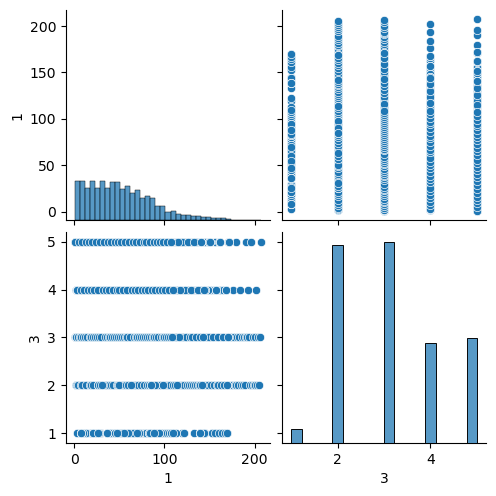

In [13]:
sns.pairplot(df1)

# seprate input and output

In [16]:
x = df1.drop('F_M', axis = 1)
y = df1['F_M']

<Axes: xlabel='YES', ylabel='count'>

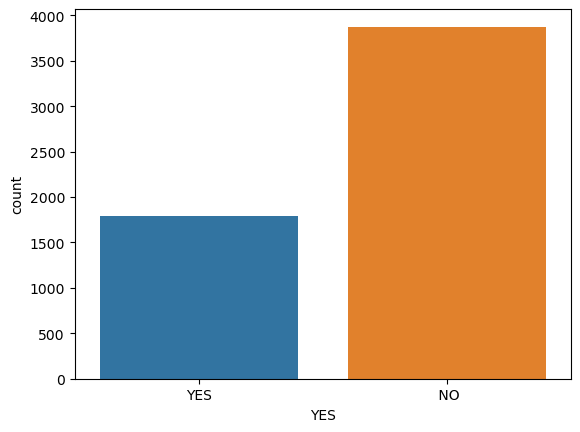

In [18]:
sns.countplot(x = df1['YES'])

<Axes: xlabel='F', ylabel='count'>

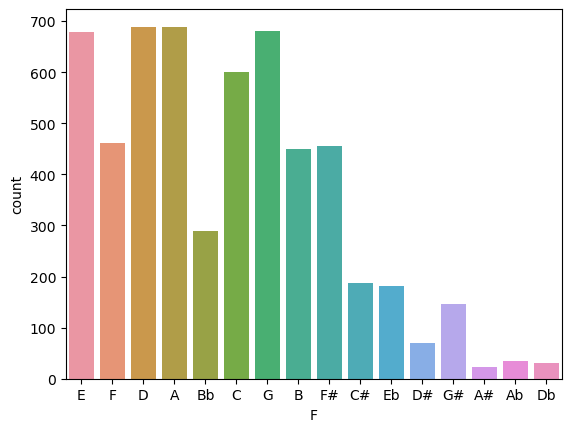

In [22]:
sns.countplot(x = df1['F'])

<Axes: xlabel='3', ylabel='count'>

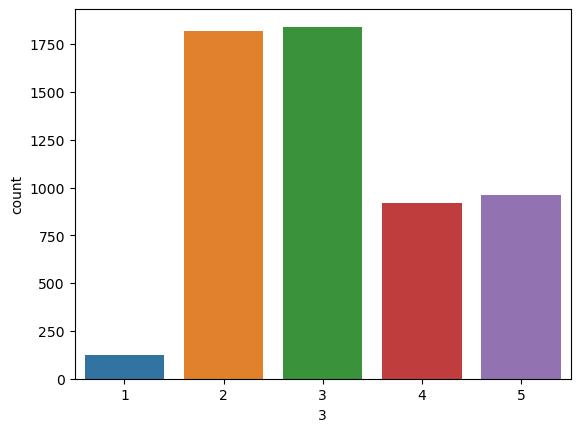

In [23]:
sns.countplot(x = df1['3'])

C:\Users\mihik\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


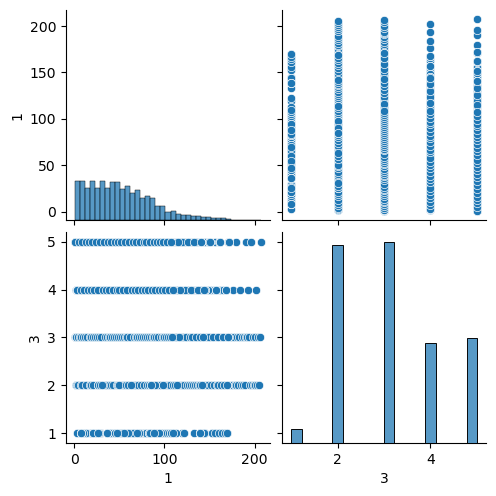

In [24]:
sns.pairplot(df1)

In [49]:
y.value_counts()

F_M
 D_M     503
 G_M     489
 C_M     488
 F_M     388
 A_M     352
        ... 
 F_d7      1
 DbM7      1
 Ebd       1
 Abd       1
 F#d7      1
Name: count, Length: 102, dtype: int64

C:\Users\mihik\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


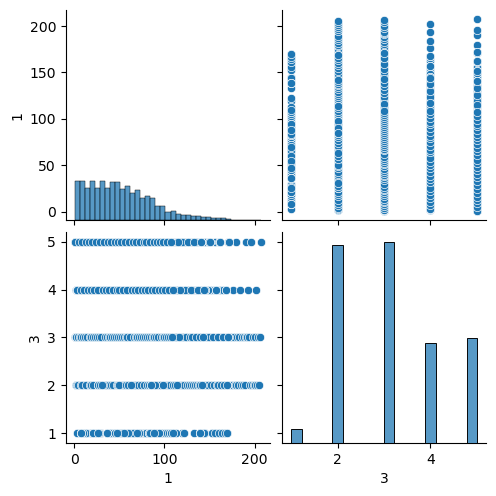

In [48]:
# Extract numerical columns
numerical_columns = ['1', 'NO', 'NO.1', 'NO.2', 'NO.3', 'NO.4', 'NO.5', 'NO.6', 'NO.7', 'NO.8', '3']

# Select numerical columns for the pair plot
pair_plot_data = df1[numerical_columns]

# Plot pair plot
sns.pairplot(pair_plot_data)
plt.show()

In [71]:
# 5 - k5 k columns banao

one = df1.iloc[:, 0:5]
one['F_M']= y

two = df1.iloc[:, 5:10]
two['F_M']= y
three = df1.iloc[:, 10:15]
three['F_M']= y
four = df1.iloc[:, 15:]
four['F_M']= y

C:\Users\mihik\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


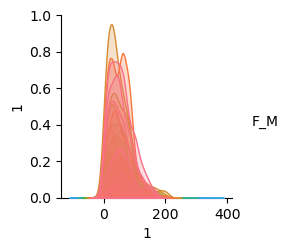

In [72]:
sns.pairplot(one, hue='F_M')

In [75]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [76]:
X = df1.drop(columns=['F_M'])  # Features
y = df1['F_M']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Perform cross-validation
cross_val_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5)  # 5-fold cross-validation
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Accuracy:", cross_val_scores.mean())

C:\Users\mihik\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mihik\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mihik\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mihik\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mihik\anaconda3\Lib\site-packages\sklearn\base.py", line 621, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mihik\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 1147, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "C:\Users\mihik\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 917, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mihik\anaconda3\Lib\site-packages\sklearn\utils\_array_api.py", line 380, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mihik\anaconda3\Lib\site-packages\pandas\core\generic.py", line 1998, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: '014406b_'

--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mihik\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mihik\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mihik\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mihik\anaconda3\Lib\site-packages\sklearn\base.py", line 621, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mihik\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 1147, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "C:\Users\mihik\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 917, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mihik\anaconda3\Lib\site-packages\sklearn\utils\_array_api.py", line 380, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mihik\anaconda3\Lib\site-packages\pandas\core\generic.py", line 1998, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: '013506b_'
